# Aula 2

In [1]:
import pandas as pd

df = pd.read_csv("CC GENERAL.csv")
df.drop(columns=["CUST_ID", "TENURE"], inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [2]:
missing = df.isna().sum() #quantos dados nulos possuímos
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [3]:
df.fillna(df.median(), inplace=True)#compleatando os valores nulos com mediana

In [4]:
missing = df.isna().sum() #quantos dados nulos possuímos
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [5]:
#os dados foram limpos e organizados, agora iremos normalizar os nossos dados usando o sklearn

In [6]:
from sklearn.preprocessing import Normalizer #Valores entre zero e um
values = Normalizer().fit_transform(df.values)
print(values)
#atributus entre zero e um e todos os dados limpos e completos

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300) #Kmeans algoritmo não determinado que cada vez que ele roda gera um
#resultado diferente e isso faz com que ele tenha que rodar 10x seguida e me retornar o mesmo valor
y_pred = kmeans.fit_predict(values)

In [8]:
#Vamos conhecer algumas métricas de validação existentes, 
#que são dividas basicamente em duas categorias: métricas externas e internas.

In [9]:
#Testando o tamanho da silhueta

In [10]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values,labels,metric='euclidean')
print(silhouette) 

0.36459833631826266


In [11]:
#Matemática do Davies-Bouldin

In [12]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0754516255078055


In [13]:
calinski = metrics.calinski_harabasz_score(values, labels) 
print(calinski)

3431.7895754356236


In [18]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [19]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.32724464582661594 1.3093507662143307 3526.466834451541


In [20]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3644845919974304 1.075713859061329 3431.7937428414302


In [21]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3513213336461363 1.1173538269744931 3019.1285366089546


In [25]:
df.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [22]:
import numpy as np
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2,dbs2, calinski2)

0.03958507563573483 3.463796924574763 302.2489764249147
0.3644845919974304 1.075713859061329 3431.7937428414302


In [26]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36908155221853267 1.0580445685596032 1204.0558494933455
0.35416642754504835 1.1382306445993162 1194.9519865048878
0.3670355256183801 1.0993767580167497 1167.5313828364535


<function matplotlib.pyplot.show(close=None, block=None)>

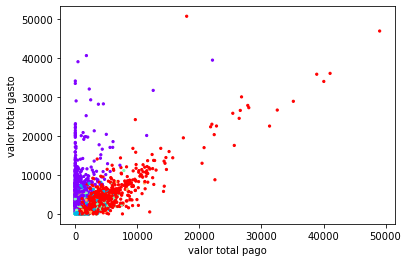

In [28]:
import matplotlib.pyplot as plt
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=labels, s=5, cmap='rainbow' ) #Gráfico de pontinhos
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density. Either provide the bandwidth during initialization or use an alternative method.

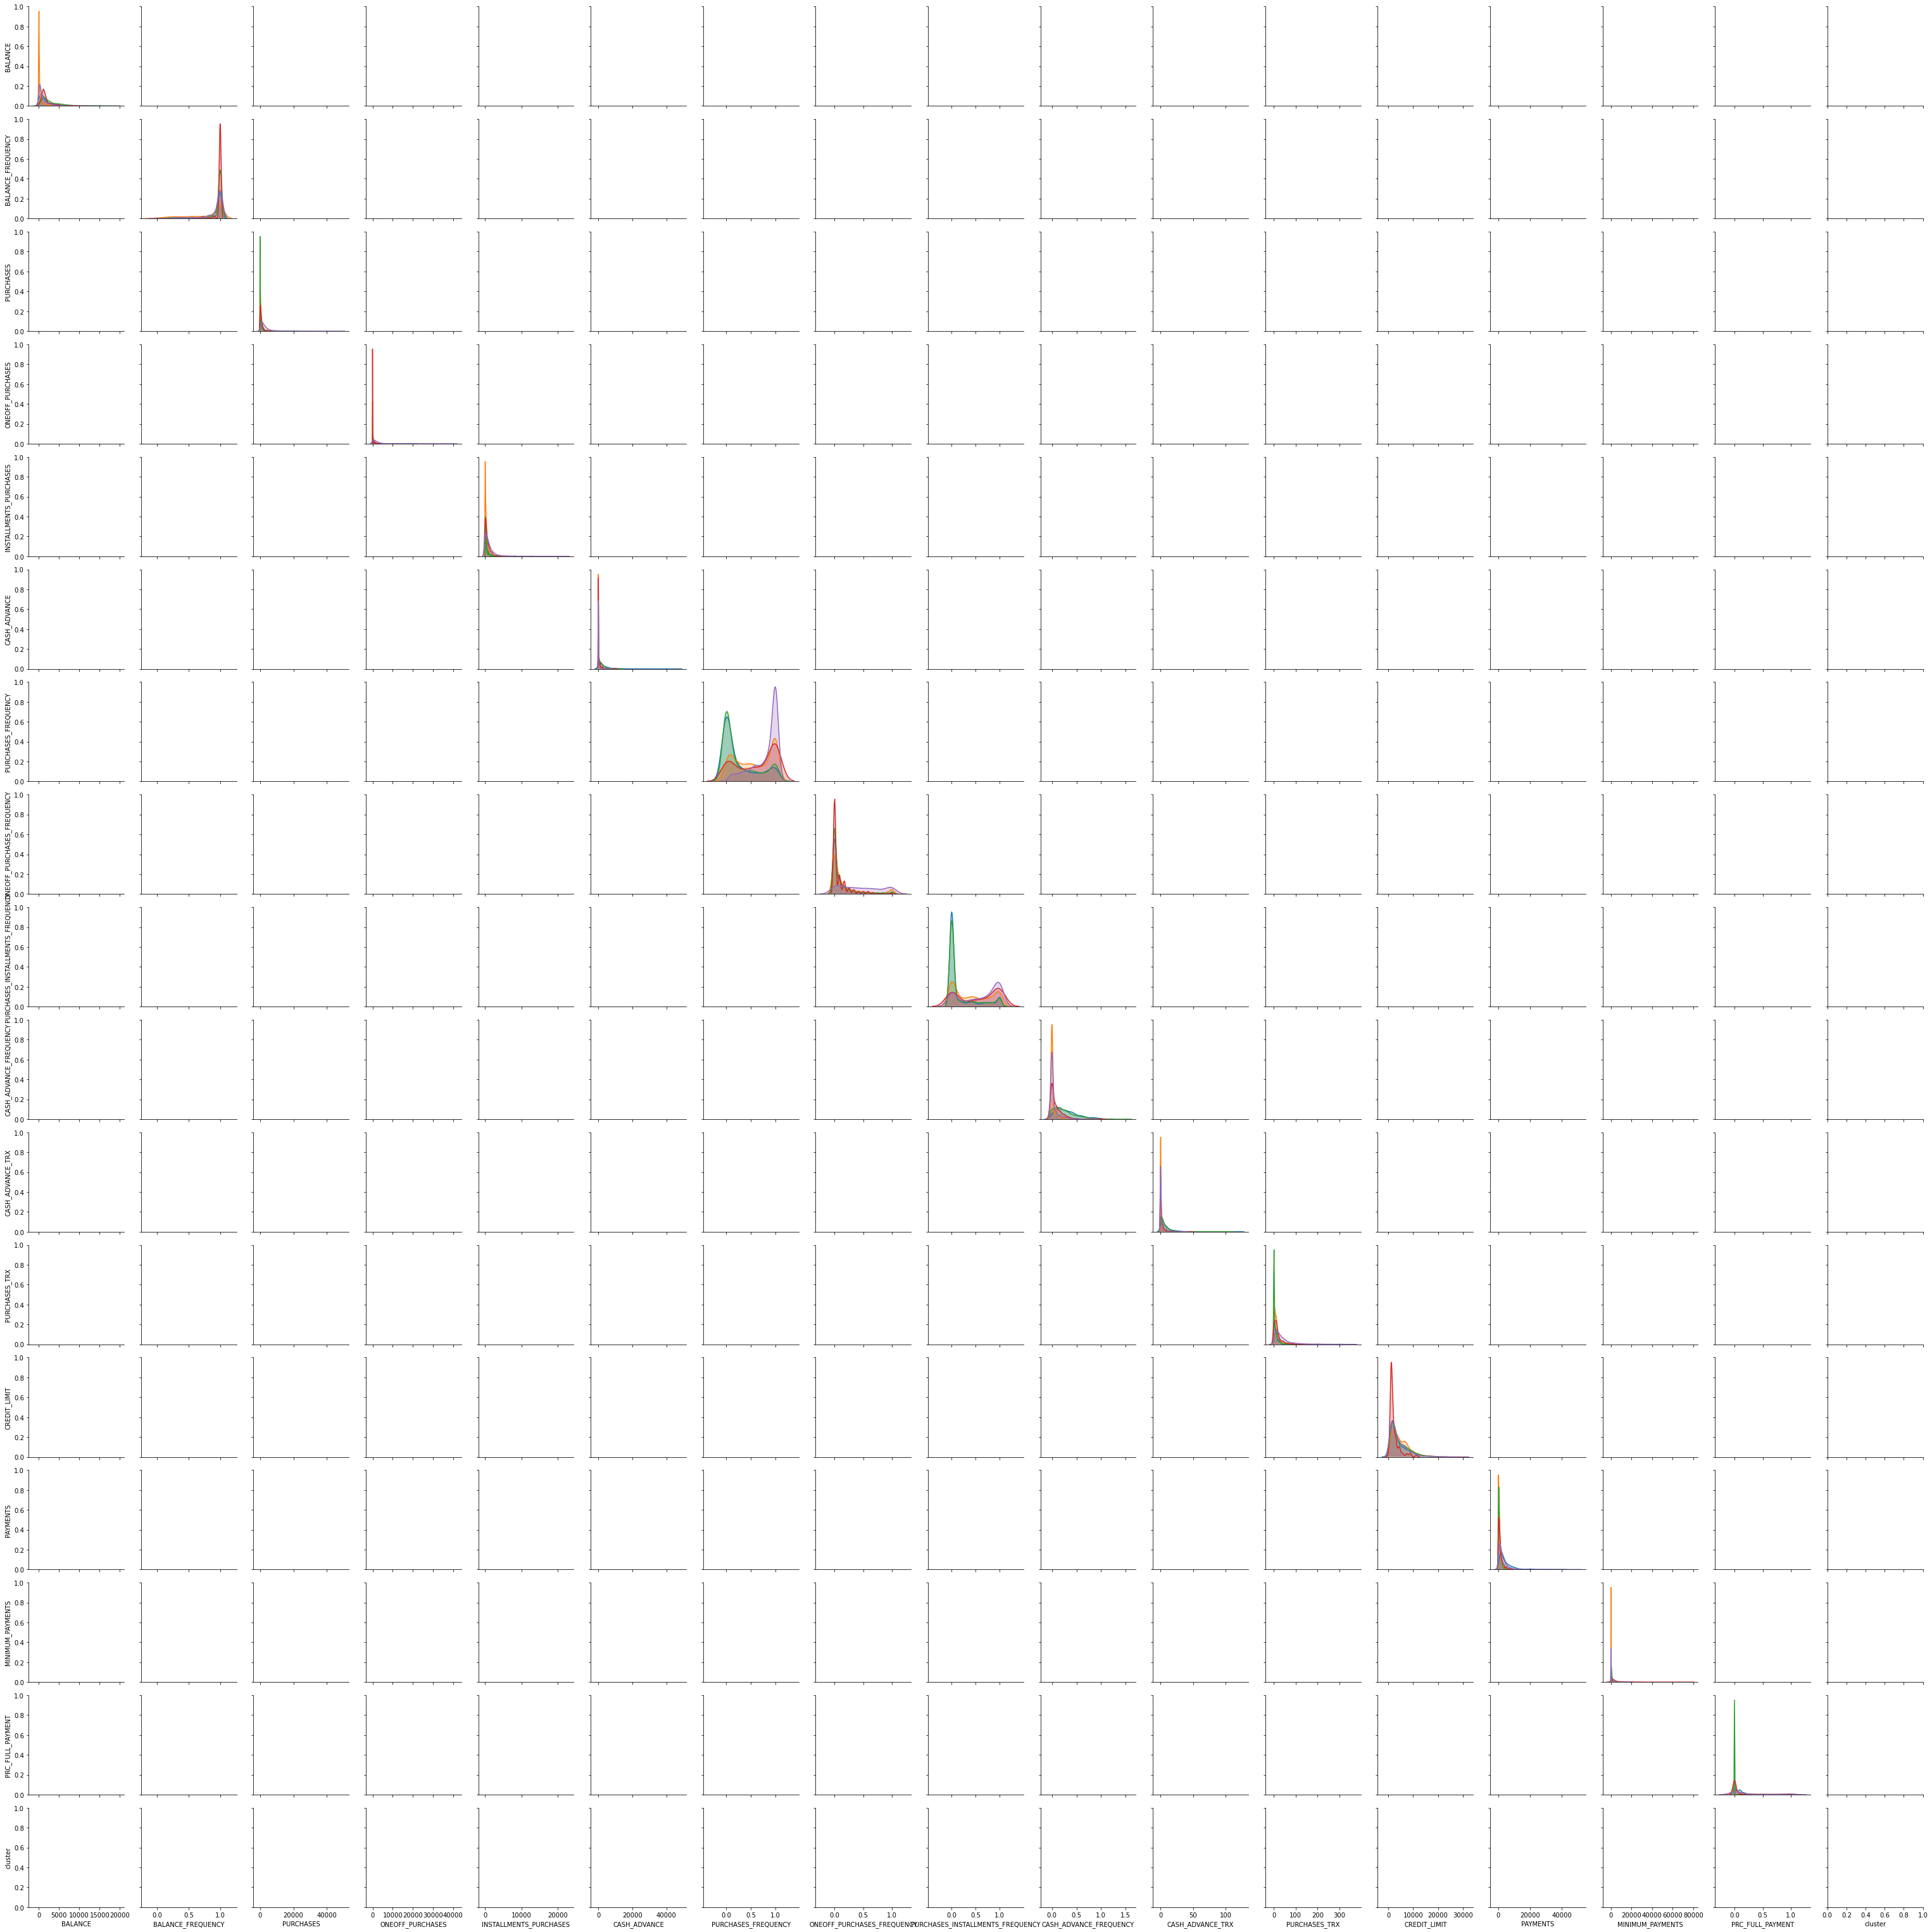

In [30]:
import seaborn as sns
df["cluster"] = labels
sns.pairplot(df[0:], hue="cluster")

In [31]:
centroids = kmeans.cluster_centers_
print(centroids)

[[2.35020532e-01 2.16345960e-04 6.06790631e-02 3.46654524e-02
  2.60188155e-02 3.99732746e-01 5.27360762e-05 2.06331580e-05
  3.52132458e-05 6.54181527e-05 1.56996421e-03 1.12617203e-03
  5.35420907e-01 5.97922677e-01 1.04228708e-01 2.77090123e-05]
 [6.90890221e-02 2.30787435e-04 1.21507361e-01 4.79670320e-02
  7.36405575e-02 2.43310654e-02 1.72863102e-04 3.36686718e-05
  1.40328311e-04 7.92341768e-06 1.23962309e-04 2.86381277e-03
  9.43564102e-01 1.53799817e-01 5.68529799e-02 7.61493366e-05]
 [5.04304115e-01 2.72240037e-04 6.19065286e-02 3.63718661e-02
  2.55563592e-02 2.52712219e-01 6.74445184e-05 2.58563809e-05
  4.50311640e-05 5.73955073e-05 1.15600055e-03 1.33430324e-03
  7.19065068e-01 1.66279141e-01 1.79426352e-01 5.51886878e-07]
 [3.31819573e-01 2.68108548e-04 1.57897411e-01 3.53667582e-02
  1.22917205e-01 5.86410734e-02 1.66414675e-04 2.54680510e-05
  1.47782323e-04 1.94162395e-05 4.30027427e-04 3.85903103e-03
  3.75754913e-01 2.51801450e-01 6.81590209e-01 4.26067138e-06]
 [1.

In [34]:
max = len(centroids[0])
for i in range(max):
    print(df.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0361
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0546
PRC_FULL_PAYMENT 
0.0000


In [36]:
df.groupby("cluster")["BALANCE"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1073.0,1795.328292,1982.485775,0.000000,507.076999,1088.056301,2315.003636,14581.459140
1,3280.0,443.746756,846.398201,0.000000,23.365333,82.941478,410.126095,9630.367575
2,2651.0,3036.934613,2478.185068,6.824905,1257.895616,2173.970603,4223.849965,18495.558550
3,409.0,1989.027555,1858.869791,70.794108,1016.583226,1330.716005,2149.205166,11670.179850
4,1537.0,1142.320861,1664.363459,0.000000,212.282538,555.131027,1370.317105,19043.138560


In [39]:
description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
print(description.mean())

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS
cluster                                                                   
0        1795.328292   476.810531   3267.199032   3982.452201  4713.384730
1         443.746756   629.249107    141.482978   5130.547795   814.294226
2        3036.934613   385.478510   1635.682267   4493.681630   968.765803
3        1989.027555   855.672225    423.188665   2230.195599  1338.842680
4        1142.320861  3273.425517    183.376625   4097.306540  3036.763695


<ipython-input-39-1582919b9f30>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


In [41]:
description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1795.328292   476.810531   3267.199032   3982.452201  4713.384730   
1         443.746756   629.249107    141.482978   5130.547795   814.294226   
2        3036.934613   385.478510   1635.682267   4493.681630   968.765803   
3        1989.027555   855.672225    423.188665   2230.195599  1338.842680   
4        1142.320861  3273.425517    183.376625   4097.306540  3036.763695   

         n_clients  
cluster             
0             1073  
1             3280  
2             2651  
3              409  
4             1537  


<ipython-input-41-71a233e89f3c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


In [43]:
df.groupby("cluster")["BALANCE"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1073.0,1795.328292,1982.485775,0.000000,507.076999,1088.056301,2315.003636,14581.459140
1,3280.0,443.746756,846.398201,0.000000,23.365333,82.941478,410.126095,9630.367575
2,2651.0,3036.934613,2478.185068,6.824905,1257.895616,2173.970603,4223.849965,18495.558550
3,409.0,1989.027555,1858.869791,70.794108,1016.583226,1330.716005,2149.205166,11670.179850
4,1537.0,1142.320861,1664.363459,0.000000,212.282538,555.131027,1370.317105,19043.138560


In [44]:
CLUSTER 0: Clientes que gastam pouco.
CLUSTER 1: Clientes que mais gastam. O foco deles é saque.
CLUSTER 2: Clientes que gastam muito com compras.
CLUSTER 3: Clientes que gastam muito com saques.
CLUSTER 4:

SyntaxError: invalid syntax (<ipython-input-44-a3a50b4a8da2>, line 1)

In [46]:
description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1795.328292   476.810531   3267.199032   3982.452201  4713.384730   
1         443.746756   629.249107    141.482978   5130.547795   814.294226   
2        3036.934613   385.478510   1635.682267   4493.681630   968.765803   
3        1989.027555   855.672225    423.188665   2230.195599  1338.842680   
4        1142.320861  3273.425517    183.376625   4097.306540  3036.763695   

         n_clients  
cluster             
0             1073  
1             3280  
2             2651  
3              409  
4             1537  


<ipython-input-46-71a233e89f3c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


In [47]:
CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite.
CLUSTER 1: Clientes que mais gastam. O foco deles é saque.
CLUSTER 2: Clientes que gastam muito com compras.
CLUSTER 3: Clientes que gastam muito com saques.
CLUSTER 4: Clientes com o menor limite.

SyntaxError: invalid syntax (<ipython-input-47-7ce2e1dd823b>, line 1)

In [ ]:
CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.